In [1]:
import numpy as np
import pandas as pd
import os,cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
from keras.utils import to_categorical
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import tensorflow as tf
import tensorflow_hub as hub
rcParams['figure.figsize'] = 20, 10


In [2]:
data_dir = "Updated Termite Images"
species_names = sorted(os.listdir(data_dir))  # Get sorted list of species names
num_classes = len(species_names)

In [3]:
species_names

['Coptotermes curvignathus',
 'Coptotermes sepangensis',
 'Cryptotermes sukauensis',
 'Glyptotermes brevicaudatus',
 'Glyptotermes dentatus',
 'Glyptotermes paracaudomunitus',
 'Glyptotermes paratuberculatus',
 'Glyptotermes sepilokensis',
 'Heterotermes tenuoir',
 'Neotermes tectonae',
 'Schedorhinotermes brevialatus',
 'Schedorhinotermes javanicus',
 'Schedorhinotermes sarawakensis',
 'Schedorhinotermes tarakanensis']

In [4]:
num_classes

14

In [5]:
species_to_label = {
    'Coptotermes curvignathus':0,
    'Coptotermes sepangensis':1,
    'Cryptotermes sukauensis':2,
    'Glyptotermes brevicaudatus':3,
    'Glyptotermes dentatus':4,
    'Glyptotermes paracaudomunitus':5,
    'Glyptotermes paratuberculatus':6,
    'Glyptotermes sepilokensis':7,
    'Heterotermes tenuoir':8,
    'Neotermes tectonae':9,
    'Schedorhinotermes brevialatus':10,
    'Schedorhinotermes javanicus':11,
    'Schedorhinotermes sarawakensis':12,
    'Schedorhinotermes tarakanensis':13
    
}

In [6]:
def load_images(data_dir, species_to_label, img_size=(224, 224)):
    resized_img_list = []
    labels = []
    for species_name in species_names:
        species_dir = os.path.join(data_dir, species_name)
        numerical_label = species_to_label[species_name]
        for root, dirs, files in os.walk(species_dir):
            for img_file in files:
                img_path = os.path.join(root, img_file)
                input_img = cv2.imread(img_path)
                if input_img is not None:
                    input_img_resize = cv2.resize(input_img, img_size)
                    resized_img_list.append(input_img_resize)
                    labels.append(numerical_label)
                    print(f'Loaded image: {img_file} | Species: {species_name} | Label: {numerical_label}')
    print("All images loaded.")
    return np.array(resized_img_list), to_categorical(np.array(labels), num_classes)

In [7]:
img_data, labels = load_images(data_dir, species_to_label)

Loaded image: 1Antennae 1.jpg | Species: Coptotermes curvignathus | Label: 0
Loaded image: 1Antennae 10.jpg | Species: Coptotermes curvignathus | Label: 0
Loaded image: 1Antennae 11.jpg | Species: Coptotermes curvignathus | Label: 0
Loaded image: 1Antennae 12.jpg | Species: Coptotermes curvignathus | Label: 0
Loaded image: 1Antennae 13.jpg | Species: Coptotermes curvignathus | Label: 0
Loaded image: 1Antennae 14.jpg | Species: Coptotermes curvignathus | Label: 0
Loaded image: 1Antennae 15.jpg | Species: Coptotermes curvignathus | Label: 0
Loaded image: 1Antennae 16.jpg | Species: Coptotermes curvignathus | Label: 0
Loaded image: 1Antennae 17.jpg | Species: Coptotermes curvignathus | Label: 0
Loaded image: 1Antennae 18.jpg | Species: Coptotermes curvignathus | Label: 0
Loaded image: 1Antennae 19.jpg | Species: Coptotermes curvignathus | Label: 0
Loaded image: 1Antennae 2.jpg | Species: Coptotermes curvignathus | Label: 0
Loaded image: 1Antennae 20.jpg | Species: Coptotermes curvignathus

In [8]:
x,y = shuffle(img_data,labels,random_state=2)

In [9]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=2)

In [10]:
mobilenet_v2 = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
mobile_net_layers = hub.KerasLayer(mobilenet_v2, input_shape=(224, 224, 3))
mobile_net_layers.trainable = False

# Neural Network Architecture
neural_net = tf.keras.Sequential([
    mobile_net_layers,
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(num_classes, activation='softmax')  # Adjusted for binary classification
])

neural_net.summary()

neural_net.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=['acc']
)



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 14)                17934     
                                                                 
Total params: 2275918 (8.68 MB)
Trainable params: 17934 (70.05 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [11]:
# Training the model
model_fit = neural_net.fit(X_train, y_train, epochs=6, validation_data=(X_test, y_test))

Epoch 1/6


c:\Python311\Lib\site-packages\keras\src\backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


358/358 [==============================] - 192s 517ms/step - loss: 1.9406 - acc: 0.3559 - val_loss: 1.4049 - val_acc: 0.5557
Epoch 2/6
358/358 [==============================] - 182s 509ms/step - loss: 1.4029 - acc: 0.5339 - val_loss: 1.1788 - val_acc: 0.6165
Epoch 3/6
358/358 [==============================] - 185s 518ms/step - loss: 1.2243 - acc: 0.5955 - val_loss: 1.0800 - val_acc: 0.6550
Epoch 4/6
358/358 [==============================] - 182s 510ms/step - loss: 1.1189 - acc: 0.6318 - val_loss: 0.9801 - val_acc: 0.6929
Epoch 5/6
358/358 [==============================] - 180s 504ms/step - loss: 1.0600 - acc: 0.6508 - val_loss: 0.9395 - val_acc: 0.7024
Epoch 6/6
358/358 [==============================] - 180s 503ms/step - loss: 0.9991 - acc: 0.6744 - val_loss: 0.8947 - val_acc: 0.7150


In [12]:

# Evaluate on test data
test_score = neural_net.evaluate(X_test, y_test)

predictions = neural_net.predict(X_test)

239/239 [==============================] - 74s 304ms/step


In [13]:
neural_net.save('TermiteModel-2.h5')

c:\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


239/239 [==============================] - 76s 310ms/step


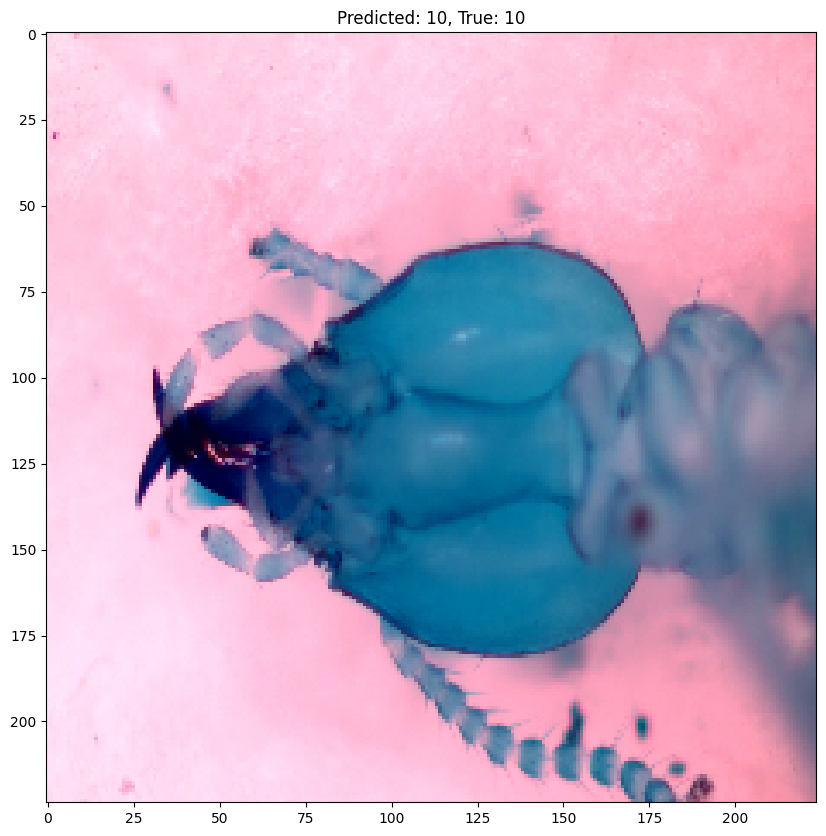

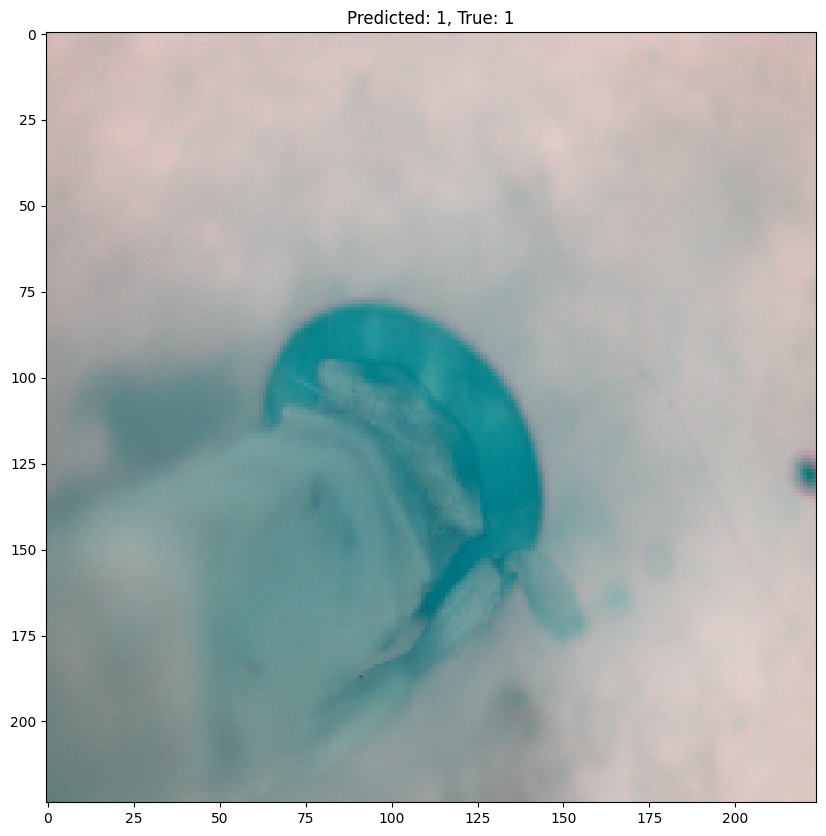

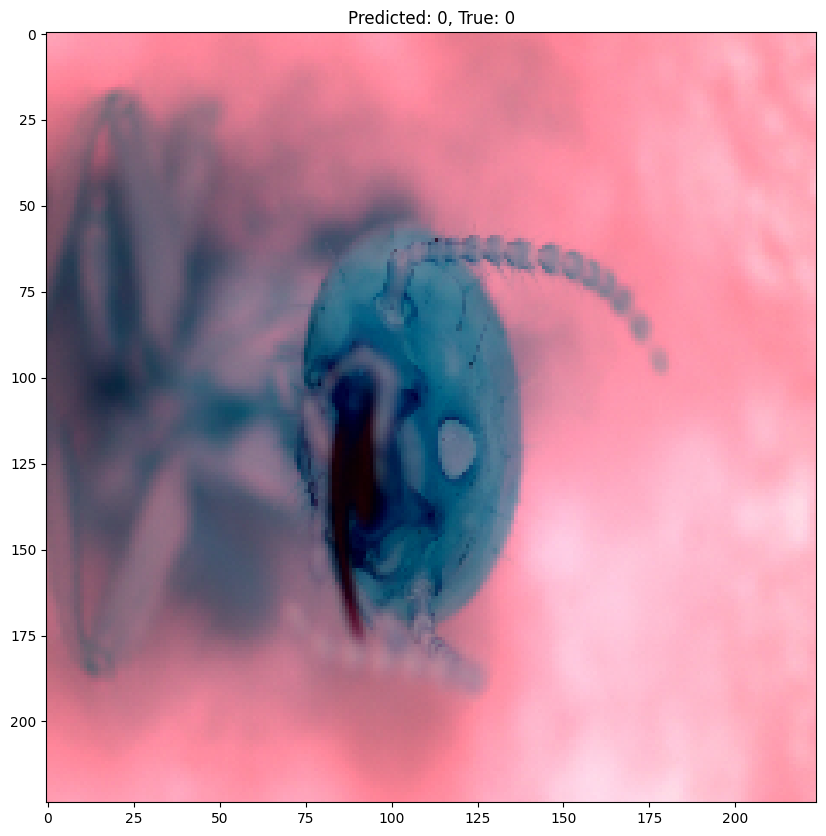

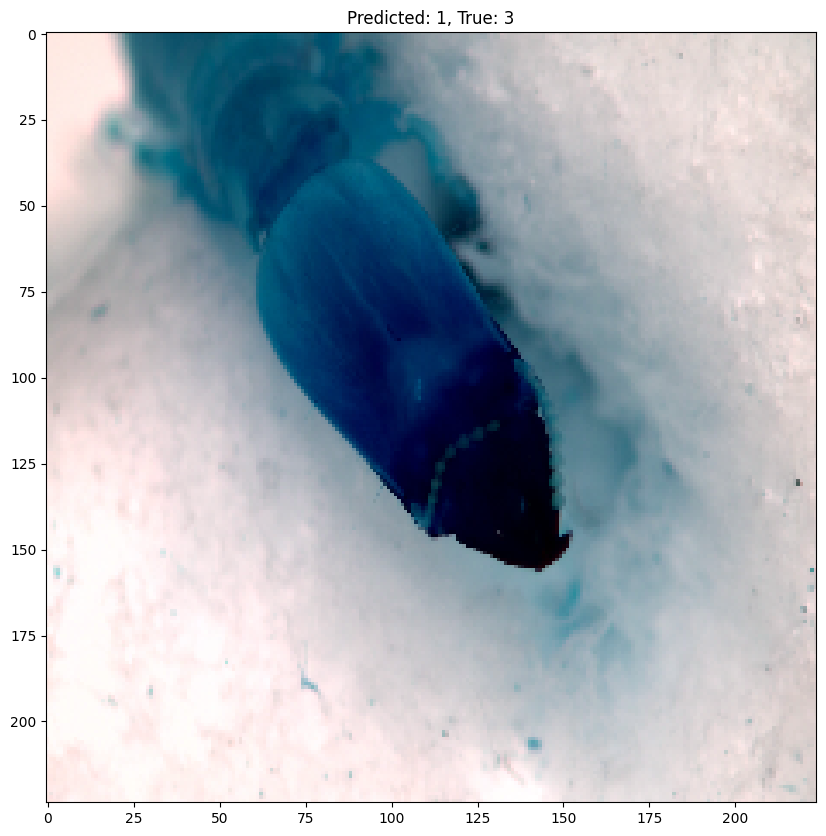

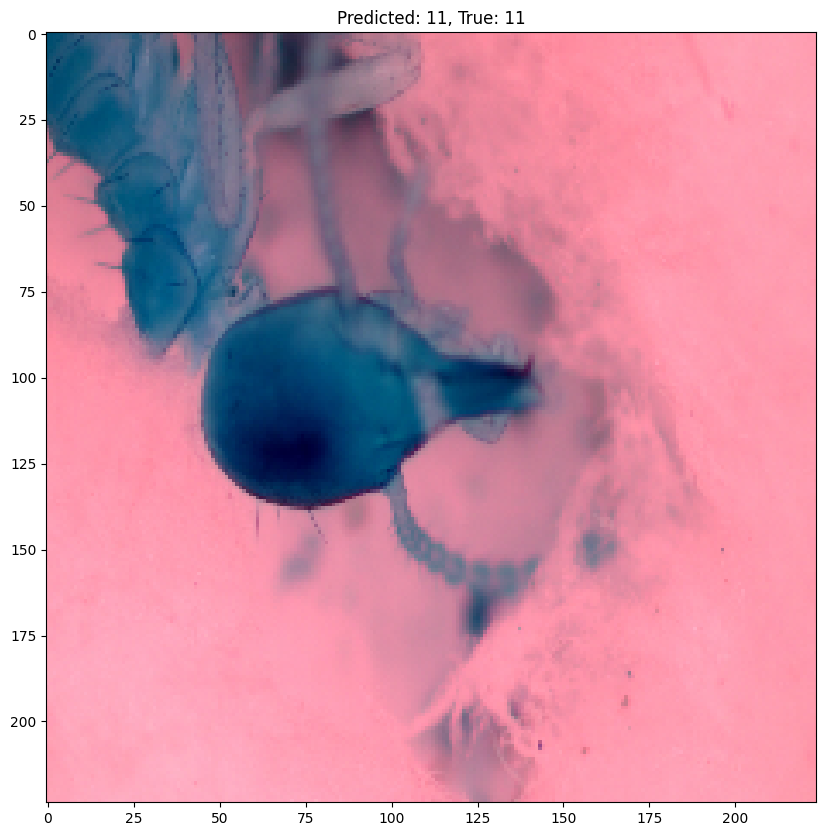

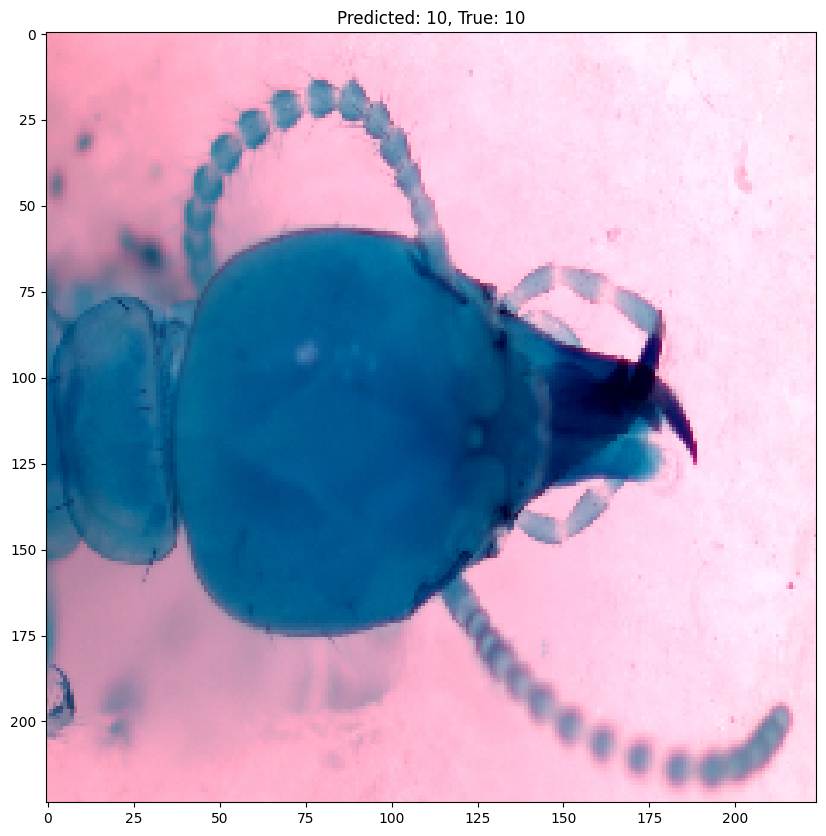

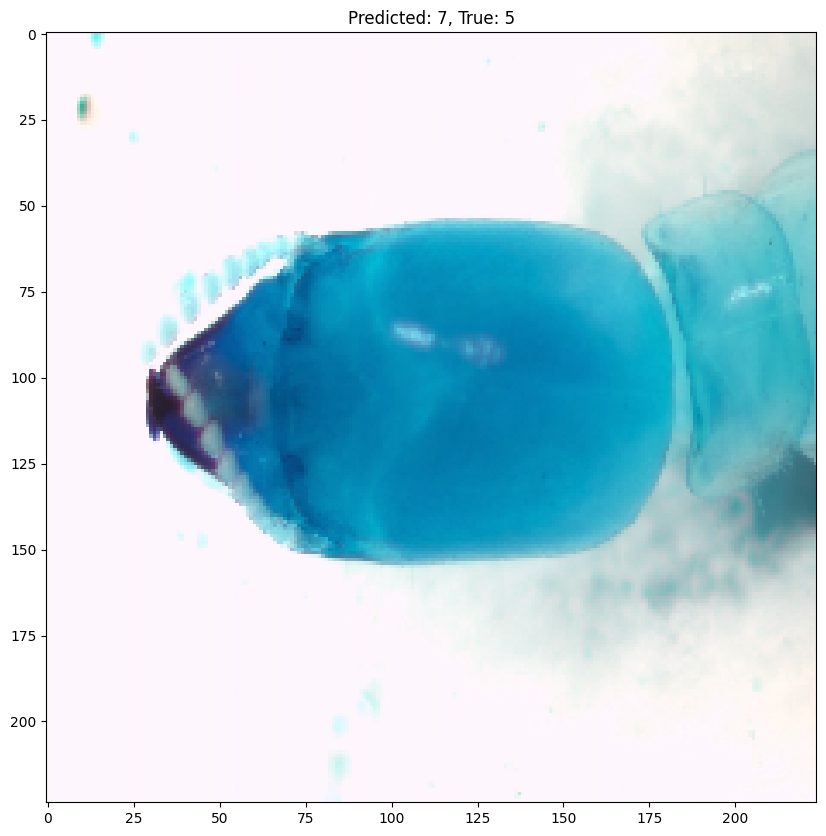

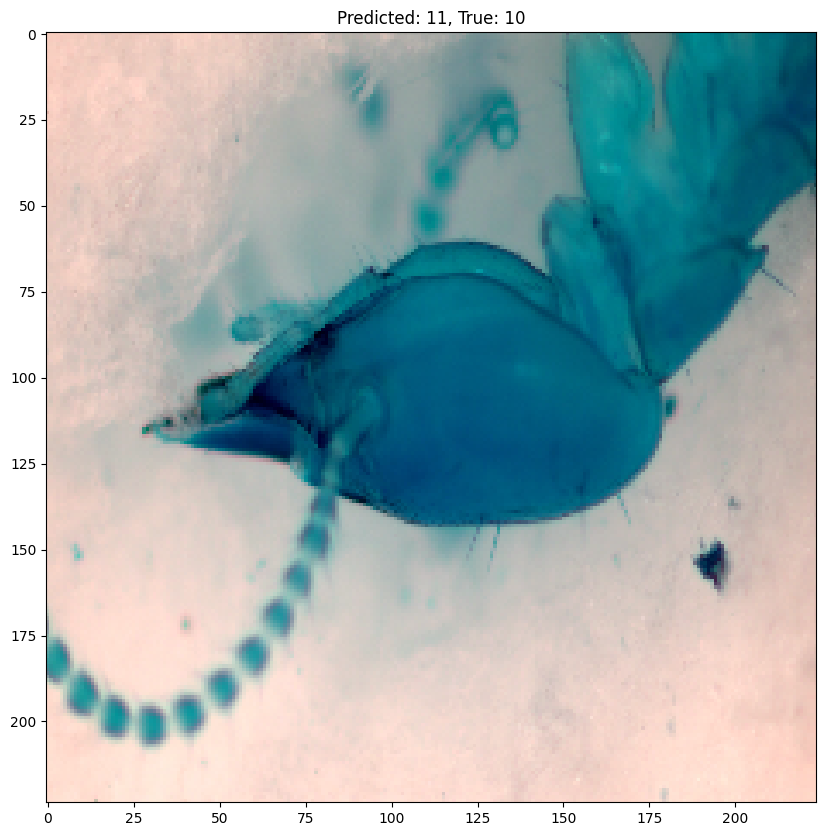

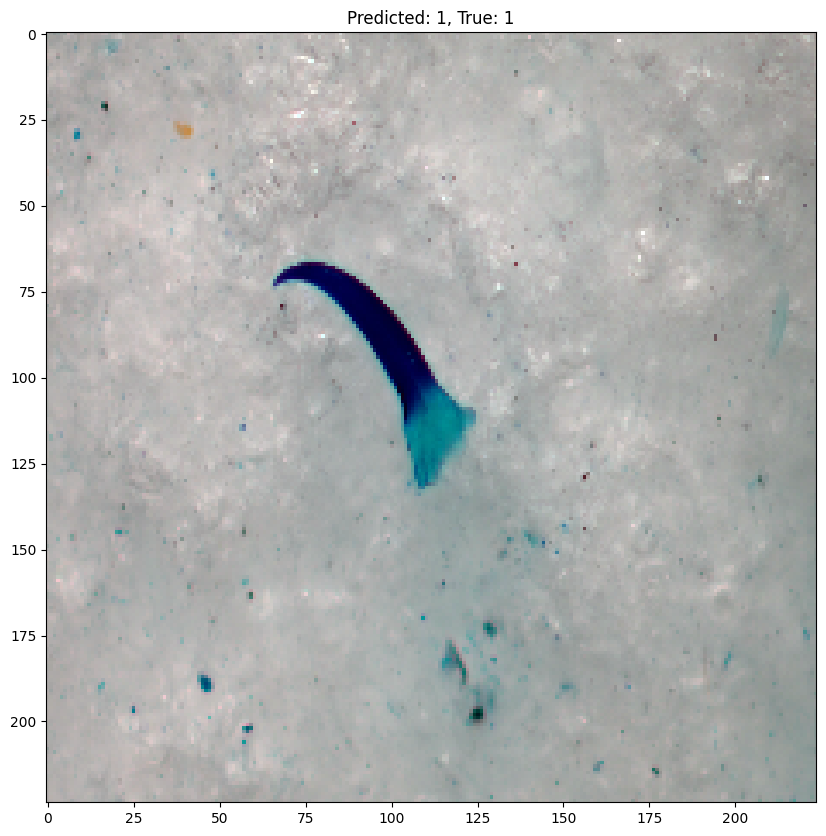

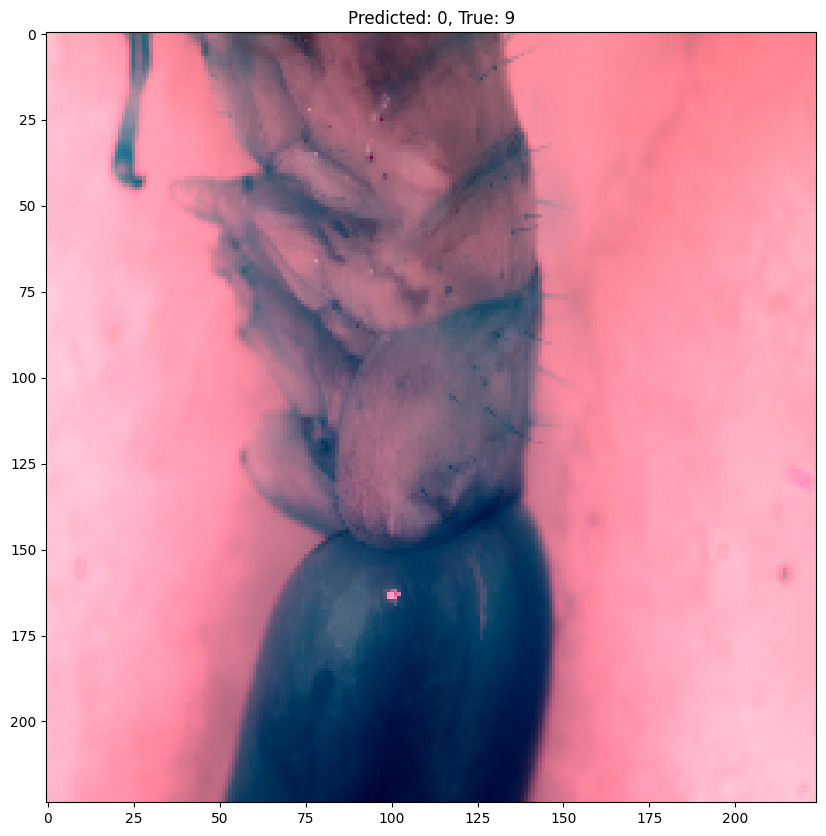

In [14]:
def load_model_with_custom_objects(model_path):
    # Register the custom objects (KerasLayer from TensorFlow Hub)
    custom_objects = {'KerasLayer': hub.KerasLayer}
    # Load the model
    loaded_model = tf.keras.models.load_model(model_path, custom_objects=custom_objects)
    return loaded_model

# Load the model using the defined function
loaded_model = load_model_with_custom_objects('TermiteModel-2.h5')

# Now you can make predictions and display them as before
predictions = loaded_model.predict(X_test)
for i in range(20, 30):
    predicted_label = tf.argmax(predictions[i]).numpy()
    true_label = tf.argmax(y_test[i]).numpy()
    
    plt.figure()
    plt.imshow(X_test[i])
    plt.title(f"Predicted: {predicted_label}, True: {true_label}")
    plt.show()

596/596 [==============================] - 183s 308ms/step


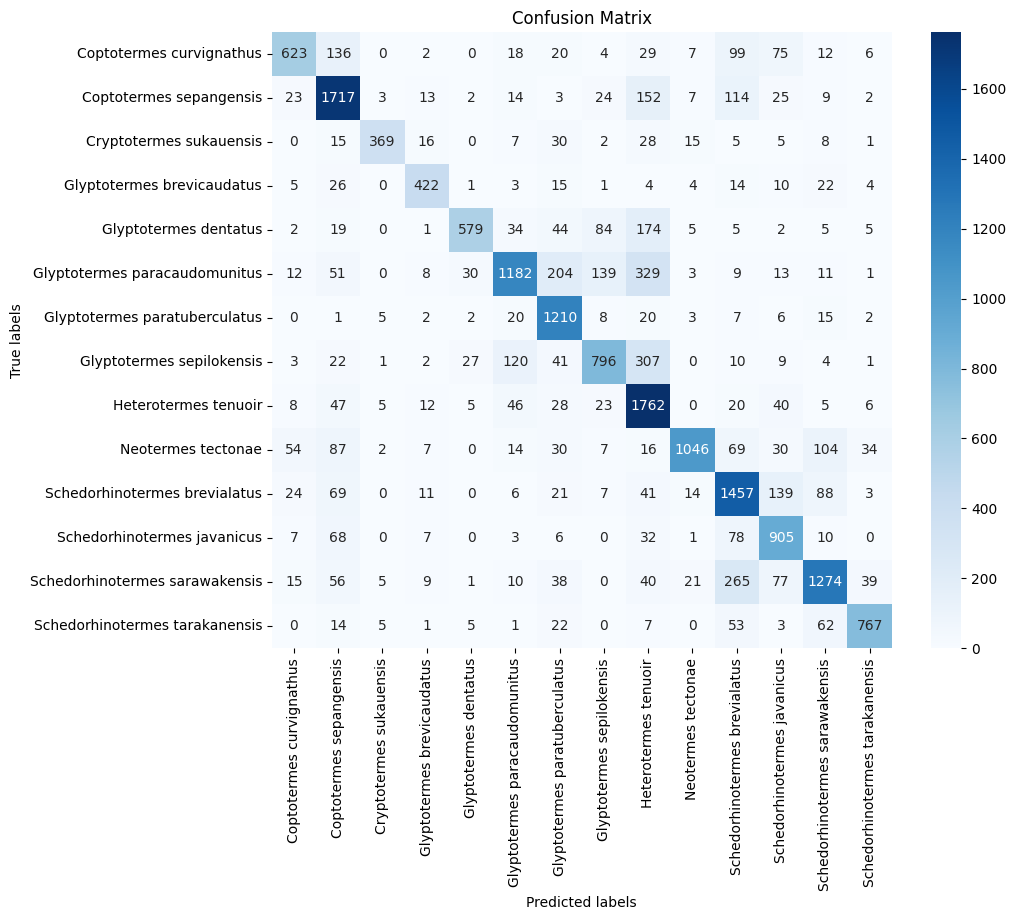

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate predictions for the entire dataset
predictions = loaded_model.predict(img_data)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(labels, axis=1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=species_names, yticklabels=species_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [4]:
import tensorflow as tf
import tensorflow_hub as hub

def load_model_with_custom_objects(model_path):
    # Register the custom objects (KerasLayer from TensorFlow Hub)
    custom_objects = {'KerasLayer': hub.KerasLayer}
    # Load the model
    loaded_model = tf.keras.models.load_model(model_path, custom_objects=custom_objects)
    return loaded_model

# Load the model using the defined function
loaded_model = load_model_with_custom_objects('TermiteModel-2.h5')
# Convert the model to TFLite format
converter = tf.lite.TFLiteConverter.from_keras_model(loaded_model)
tflite_model = converter.convert()

# Save the TFLite model to a file
with open('converted_model.tflite', 'wb') as f:
    f.write(tflite_model)


INFO:tensorflow:Assets written to: C:\Temp\tmpr90jjf17\assets


INFO:tensorflow:Assets written to: C:\Temp\tmpr90jjf17\assets
